In [1]:
import os
import seaborn as sns
import numpy as np
os.chdir( f"../")
from pyMethTools.fit import *
from pyMethTools.comethyl import *
from pyMethTools.sim import *
from pyMethTools.bbseq import *
np.random.seed(100)

### Simulate new samples

Make some fake data to base simulations off 

In [2]:
import numpy as np
import scipy
from pyMethTools.fit import *
sample_size=30
n_cpg=5
coverage = np.empty(shape=(n_cpg,sample_size), dtype=int)
meth = np.empty(shape=(n_cpg,sample_size), dtype=int)
for sample in range(0, sample_size):
    n=int(np.random.normal(30,5))
    coverage[:,sample]=np.repeat(n,n_cpg)
    for cpg,k in zip(range(0, 6),[0.9,0.03,0.03,0.04,0.8]):
        meth[cpg,sample]=np.random.binomial(n, k, 1)[0]

regions=np.array([1,1,1,1,1])

meth

array([[19, 26, 23, 30, 36, 36, 27, 25, 22, 20, 20, 30, 26, 23, 20, 27,
        19, 32, 24, 21, 19, 24, 28, 23, 33, 31, 31, 32, 21, 28],
       [ 1,  0,  0,  0,  1,  2,  1,  3,  0,  1,  0,  3,  0,  1,  0,  0,
         1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  0,  1,  1,  2,  0,  0,  0,  1,  1,  1,  0,  1,
         1,  0,  1,  0,  0,  0,  3,  0,  1,  1,  1,  0,  1,  2],
       [ 0,  3,  3,  0,  3,  2,  0,  1,  1,  2,  0,  2,  4,  0,  1,  2,
         3,  3,  1,  1,  0,  1,  0,  0,  1,  1,  2,  4,  2,  1],
       [16, 27, 20, 27, 25, 29, 24, 24, 19, 15, 19, 31, 24, 19, 17, 23,
        14, 23, 22, 19, 14, 14, 17, 21, 31, 23, 30, 24, 18, 23]])

Fit beta binom distributions to every cpgs

In [3]:
%%time
fits=fit_betabinom(meth, coverage, regions)

CPU times: user 52.1 ms, sys: 1.85 ms, total: 54 ms
Wall time: 53.2 ms


/Users/andrewgraham/miniconda3/envs/methSimpy/lib/python3.11/site-packages/scipy/optimize/_optimize.py:835: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Simulate new data off these profiles (varying read depth per region per sample by default)

In [4]:
%%time
sim_meth, sim_coverage, adjust = sim_multiple_cpgs(fits,regions,vary_read_depth=True)
sim_meth

CPU times: user 13.4 ms, sys: 4.64 ms, total: 18.1 ms
Wall time: 14.6 ms


array([[25, 31, 28, 26, 40, 27, 28, 30, 25, 24, 35, 24, 32, 26, 28, 24,
        29, 17, 36, 18, 28, 31, 19, 26, 25, 21, 29, 26, 28, 34, 29, 27,
        26, 22, 26, 28, 31, 22, 32, 27, 24, 26, 31, 29, 35, 30, 33, 35,
        25, 29, 23, 32, 25, 32, 29, 21, 30, 23, 26, 32, 31, 19, 28, 25,
        30, 25, 30, 20, 27, 25, 31, 24, 32, 35, 25, 43, 29, 29, 24, 21,
        23, 27, 31, 24, 23, 24, 24, 24, 27, 22, 32, 30, 16, 27, 26, 33,
        23, 25, 30, 31],
       [ 4,  0,  2,  0,  0,  2,  0,  1,  0,  0,  0,  0,  1,  2,  5,  1,
         1,  1,  0,  0,  1,  1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  3,
         0,  0,  2,  0,  0,  0,  2,  1,  0,  0,  0,  1,  1,  0,  1,  0,
         0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         3,  1,  0,  0,  1,  1,  1,  0,  0,  4,  0,  1,  0,  0,  1,  0,
         1,  0,  0,  0,  2,  1,  4,  1,  0,  2,  0,  0,  0,  1,  3,  0,
         0,  1,  1,  2],
       [ 0,  1,  1,  1,  3,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,
         0,  0

We can see the proportion of methylated counts (beta values) for cpg3 is similar to the data we based our simulations on

In [5]:
beta_vals = meth/coverage
sim_beta_vals = sim_meth/sim_coverage

<Axes: ylabel='Count'>

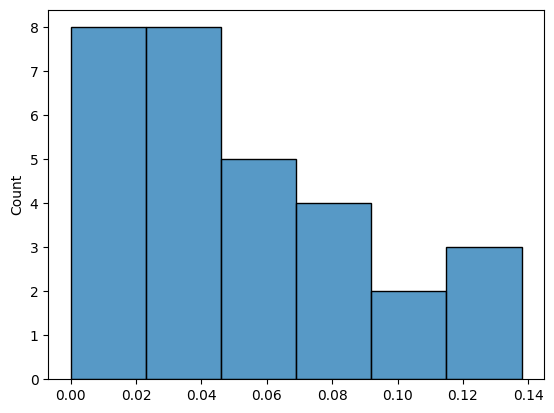

In [6]:
sns.histplot(x=beta_vals[3,:])

<Axes: ylabel='Count'>

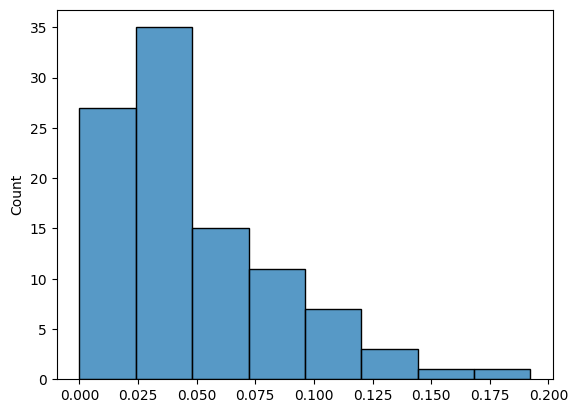

In [7]:
sns.histplot(x=sim_beta_vals[3,:])

### Finding comethylated regions

In [8]:
sample_size=15
n_cpg=15
meth_levels=[0.5,0.06,0.04,0.06,0.5,0.9,0.1,0.1,0.1,0.8, 0.6,0.12,0.13,0.14,0.5]
coverage = np.empty(shape=(n_cpg,sample_size), dtype=int)
meth = np.empty(shape=(n_cpg,sample_size), dtype=int)
for sample in range(0, sample_size):
    n=int(np.random.normal(30,2.5))
    coverage[:,sample]=np.repeat(n,n_cpg)
    for cpg,k in zip(range(0, n_cpg+1),meth_levels):
        meth[cpg,sample]=np.random.binomial(n, k, 1)[0]
regions = np.repeat([1,2,3], 5)
meth

array([[11, 19, 12, 17, 15, 13, 19, 15, 14, 13, 12, 15, 11, 14, 13],
       [ 3,  0,  1,  1,  2,  4,  2,  1,  1,  3,  3,  2,  1,  0,  2],
       [ 3,  3,  0,  2,  2,  2,  3,  1,  1,  1,  1,  2,  0,  0,  3],
       [ 1,  1,  0,  2,  3,  0,  0,  0,  2,  3,  2,  4,  3,  3,  2],
       [17, 16, 13, 15, 15, 15, 22, 15, 22, 15, 11, 19, 12, 13, 11],
       [27, 30, 27, 22, 27, 28, 28, 24, 27, 25, 20, 30, 27, 22, 22],
       [ 5,  1,  3,  2,  3,  3,  4,  0,  4,  5,  3,  2,  3,  3,  5],
       [ 3,  3,  1,  1,  4,  3,  2,  2,  2,  4,  3,  1,  3,  4,  3],
       [ 2,  5,  4,  3,  1,  5,  4,  5,  5,  5,  4,  3,  4,  1,  3],
       [28, 26, 23, 20, 25, 25, 26, 23, 29, 20, 15, 29, 28, 19, 23],
       [19, 18, 21, 14, 19, 19, 21, 19, 19, 17, 15, 19, 16, 15, 15],
       [ 3,  4,  3,  1,  5,  6,  4,  3,  3,  4,  3,  5,  3,  3,  0],
       [ 1,  4,  5,  4,  3,  3,  5,  9,  5,  3,  2,  4,  1,  4,  4],
       [ 1,  3,  1,  4,  4,  1,  2,  1,  3,  4,  1,  8,  3,  6,  6],
       [24, 14, 14, 11, 11, 14, 19

In [9]:
fits = fit_betabinom(meth, coverage, regions)

/Users/andrewgraham/miniconda3/envs/methSimpy/lib/python3.11/site-packages/scipy/optimize/_optimize.py:835: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


In [10]:
cometh = find_comethyl_regions(fits, meth, coverage, regions, min_cpgs=3)
cometh

array([1. , 1.1, 1.1, 1.1, 1. , 2. , 2.1, 2.1, 2.1, 2. , 3. , 3.1, 3.1,
       3.1, 3. ], dtype=float32)

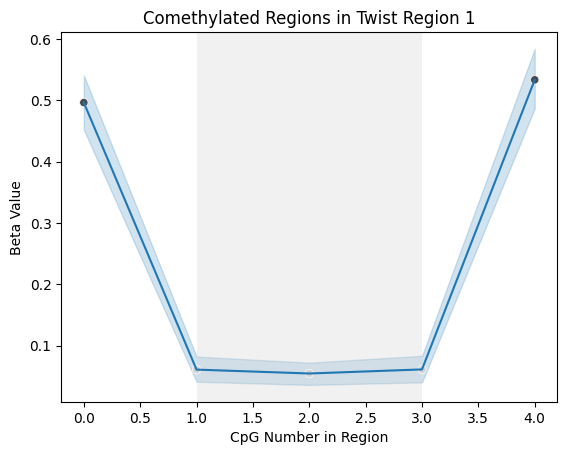

In [11]:
beta_vals = meth/coverage
region_plot(1, beta_vals, cometh)

We can see in this simple example we found that the middle three cpgs in each region share similar methylation profiles, but do not with the first and fifth cpg

### Simulating a pertubation
We can also simulate a pertubation to a set of samples, which alters the level of methylation in some of these regions.
This is done by setting adjust factor, which specifies the log2FoldChange of the proportion of reads methylated at a CpG. This adjust factor will be applied to cpgs in n_diff_regions (here 2), with half of the regions experiencing a negative change and half a positive change in the number of reads methylated over their CpGs.

In [12]:
%%time
sim_meth, sim_coverage, adjust = sim_multiple_cpgs(fits, adjust_factor=1, cometh_regions=cometh, n_diff_regions=2, vary_read_depth=True, sample_size=15)
beta_vals_sim=sim_meth/sim_coverage
sim_meth

[1.1 2.1 3.1]
CPU times: user 17 ms, sys: 2.48 ms, total: 19.5 ms
Wall time: 6.76 ms


array([[14, 11, 12, 20,  7, 15, 20, 21, 11, 13, 13, 13, 17, 14, 18],
       [ 2,  0,  1,  1,  0,  0,  0,  2,  0,  0,  1,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  1,  0,  3,  0,  0,  1,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1,  3,  1,  2,  1,  0,  1,  0,  1,  0],
       [18, 14, 12, 16, 17,  9, 24, 17, 18, 14, 12, 15, 15, 14, 26],
       [16, 24, 35, 23, 25, 26, 18, 22, 30, 32, 34, 20, 23, 26, 28],
       [ 2,  1,  2,  4,  1,  5,  2,  3,  5,  1,  2,  2,  1,  3,  4],
       [ 0,  3,  3,  2,  1,  2,  0,  1,  0,  3,  7,  2,  3,  3,  2],
       [ 2,  3,  5,  3,  2,  4,  2,  7,  5,  7,  6,  1,  6,  2,  3],
       [15, 21, 32, 20, 21, 25, 23, 21, 25, 29, 30, 22, 19, 22, 25],
       [20, 19, 14, 22, 14, 15, 17, 21, 14, 14, 19, 21, 24, 18, 21],
       [ 6,  4, 10,  5,  4,  6,  4, 11,  6,  6,  6,  8,  7,  6, 10],
       [ 9,  6, 11,  9,  3,  4,  9,  5, 14,  8, 10,  8,  5,  7,  5],
       [ 2,  4,  8, 10,  5,  7,  4,  3, 15,  7, 10,  4,  4,  9,  6],
       [20, 13, 12, 15, 13, 12, 18

We can see fron the adjust array that cpgs in region 1.1 were decreased in methylation, and cpgs in region 3.1 were increased, which we can also see by plotting out these regions

In [13]:
adjust

array([ 0., -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.])

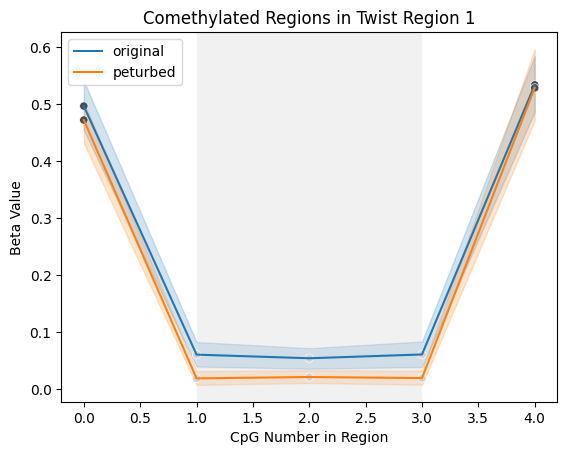

In [14]:
region_plot(1, np.concatenate([beta_vals,beta_vals_sim],axis=1) , cometh, groups=np.repeat(["original","peturbed"],15))

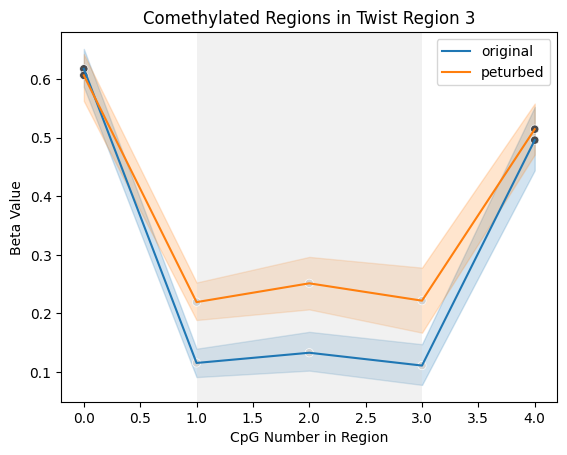

In [15]:
region_plot(3, np.concatenate([beta_vals,beta_vals_sim],axis=1) , cometh, groups=np.repeat(["original","peturbed"],15))

### Differential Methylation Analysis
Let's see if we can pick up these pertubations using beta binomial regression

In [16]:
meth_all=np.concatenate([meth,sim_meth],axis=1)
coverage_all=np.concatenate([coverage,sim_coverage],axis=1)
X=np.vstack([np.repeat(1,30),np.repeat([0,1],15)]).T
X=pd.DataFrame(X)
X.columns=['intercept','group']
X_star = X.drop(columns='group')

Lets try at the cpg level - We can see all differentially methylated cpgs are picked up 

In [17]:
res = bbseq(meth_all,coverage_all,cometh=[],covs=X,covs_disp=X_star,ncpu=1,dmrs=False)
get_contrast(res,"group")

,Estimate,se,t,p,site,padj,sig
group,-0.071883,0.134013,-0.536385,0.596085,0_0,0.812843,False
group,-1.168365,0.392792,-2.974512,0.006116,1_1,0.022934,True
group,-0.975788,0.382564,-2.550653,0.016736,2_2,0.041840,True
group,-1.063940,0.387818,-2.743397,0.010669,3_3,0.032008,True
group,-0.040858,0.159313,-0.256464,0.799537,4_4,0.856646,False
group,0.129132,0.227912,0.566588,0.575674,5_5,0.812843,False
group,-0.185450,0.230741,-0.803714,0.428582,6_6,0.812843,False
group,-0.190270,0.249011,-0.764103,0.451432,7_7,0.812843,False
group,0.109176,0.202865,0.538170,0.594869,8_8,0.812843,False
group,-0.001180,0.201553,-0.005856,0.995370,9_9,0.995370,False


We can also compute differentially methylated regions (dmrs) from contigous cpgs with similar model coefficients (i.e. similiar mean methylation level and similarly affected by the covariates - region_res) along with individual cpgs (cpg_res) - both differentially methylated regions are again picked up

In [18]:
cpg_res,region_res=bbseq(meth_all,coverage_all,regions,cometh=[],covs=X,covs_disp=X_star,ncpu=1)
get_contrast(region_res,"group")

,Estimate,se,t,p,site,padj,sig
group,-1.067585,0.221815,-4.812948,0.000050,1_1-3,0.000050,True
group,0.776956,0.129093,6.018585,0.000002,3_1-3,0.000004,True


Alternatively we can assess the differential methylation of our codistributed regions we found earlier (along with individual cpgs not in these regions) - both differentially methylated regions are again picked up

In [19]:
res=bbseq(meth_all,coverage_all,cometh=cometh,covs=X,covs_disp=X_star,ncpu=1,dmrs=False)
get_contrast(res,"group")

,Estimate,se,t,p,site,padj,sig
group,-0.071883,0.134013,-0.536385,0.596085,1.000,0.899479,False
group,-1.067585,0.221815,-4.812948,0.000050,1.1,0.000227,True
group,-0.040858,0.159313,-0.256464,0.799537,1.004,0.899479,False
group,0.129132,0.227912,0.566588,0.575674,2.005,0.899479,False
group,-0.066081,0.129425,-0.510577,0.613797,2.1,0.899479,False
group,-0.001180,0.201553,-0.005856,0.995370,2.009,0.995370,False
group,-0.038180,0.138186,-0.276294,0.784426,3.0010,0.899479,False
group,0.776956,0.129093,6.018585,0.000002,3.1,0.000018,True
group,0.055784,0.144774,0.385314,0.703024,3.0014,0.899479,False
